In [2]:
from IPython.display import HTML,Image
import datetime
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier,XGBRegressor
from wordcloud import WordCloud,STOPWORDS
import plotly
import cufflinks as cf
cf.go_offline()
sns.set_style('whitegrid')
%matplotlib inline


In [262]:
df = pd.read_csv('movies_metadata.csv')

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [263]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [264]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

#### Features

adult: Indicates if the movie is X-Rated or Adult.

belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.

budget: The budget of the movie in dollars.

genres: A stringified list of dictionaries that list out all the genres associated with the movie.

homepage: The Official Homepage of the move.

id: The ID of the move.

imdb_id: The IMDB ID of the movie.

original_language: The language in which the movie was originally shot in.

original_title: The original title of the movie.

overview: A brief blurb of the movie.

popularity: The Popularity Score assigned by TMDB.

poster_path: The URL of the poster image.

production_companies: A stringified list of production companies involved with the making of the movie.

production_countries: A stringified list of countries where the movie was shot/produced in.

release_date: Theatrical Release Date of the movie.

revenue: The total revenue of the movie in dollars.

runtime: The runtime of the movie in minutes.

spoken_languages: A stringified list of spoken languages in the film.

status: The status of the movie (Released, To Be Released, Announced, etc.)

tagline: The tagline of the movie.

title: The Official Title of the movie.

video: Indicates if there is a video present of the movie with TMDB.

vote_average: The average rating of the movie.

vote_count: The number of votes by users, as counted by TMDB.

In [265]:
df.shape

(45466, 24)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

##### There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

## Data Wrangling

In [267]:
df = df.drop(['imdb_id'], axis=1)


In [268]:
df[df['original_title'] != df['title'] ][['original_title','title','release_date']]

,original_title,title,release_date
28,La Cité des Enfants Perdus,The City of Lost Children,1995-05-16
29,摇啊摇，摇到外婆桥,Shanghai Triad,1995-04-30
32,"Guillaumet, les ailes du courage",Wings of Courage,1996-09-18
57,Il postino,The Postman,1994-09-22
58,Le confessionnal,The Confessional,1995-09-29
67,Gazon maudit,French Twist,1995-02-08
72,Les misérables,Les Miserables,1995-03-22
79,بادکنک سفید,The White Balloon,1995-01-01
81,Antonia,Antonia's Line,1995-09-12
104,Keiner liebt mich,Nobody Loves Me,1994-11-07


### There are total 11402 films whose original title and title are different these are the films are mostly non-english, so its better to drop original title

In [269]:
df = df.drop('original_title',axis=1)

In [270]:
df[df['revenue']==0].shape

(38052, 22)

#### There are total 38052 films whose revenue information is not available or zero

In [271]:
df['revenue'] =  df['revenue'].replace(0,np.nan)

In [272]:
df['budget'] = pd.to_numeric(df['budget'],errors='coerce')
df['budget'] = df['budget'].replace(0,np.nan)


In [273]:
df['budget'].isnull().sum()

36576

#### there are total 36576 films whose budget is not known

### We add following 2 features to dataset

### 1.Year : release year
### 2.Return: Revenue/Budget

In [274]:
df['return'] = df['revenue']/df['budget']
df['return'].isnull().sum()

40085

### that is we only have 5000 movies whose budget and revenue information available

In [275]:
df['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [276]:
sample= pd.to_datetime(df['release_date'],errors='coerce')[0]

In [277]:
sample.year

1995

In [278]:
df['year'] = df['release_date'].apply(lambda x : str(x).split('-')[0] if x != np.nan else np.nan)

In [279]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995


In [281]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

#### there are only 9 adult movies so it is better to drop adult column

In [282]:
df = df.drop('adult',axis=1)

In [283]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

# Exploratory Data Analysis

### Title and overview analysis

In [284]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype(str)

In [285]:
title_corpus = ''.join(df['title'])
overview_corpus = ''.join(df['overview'])

In [63]:
title_wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',height=2000,width=4000)

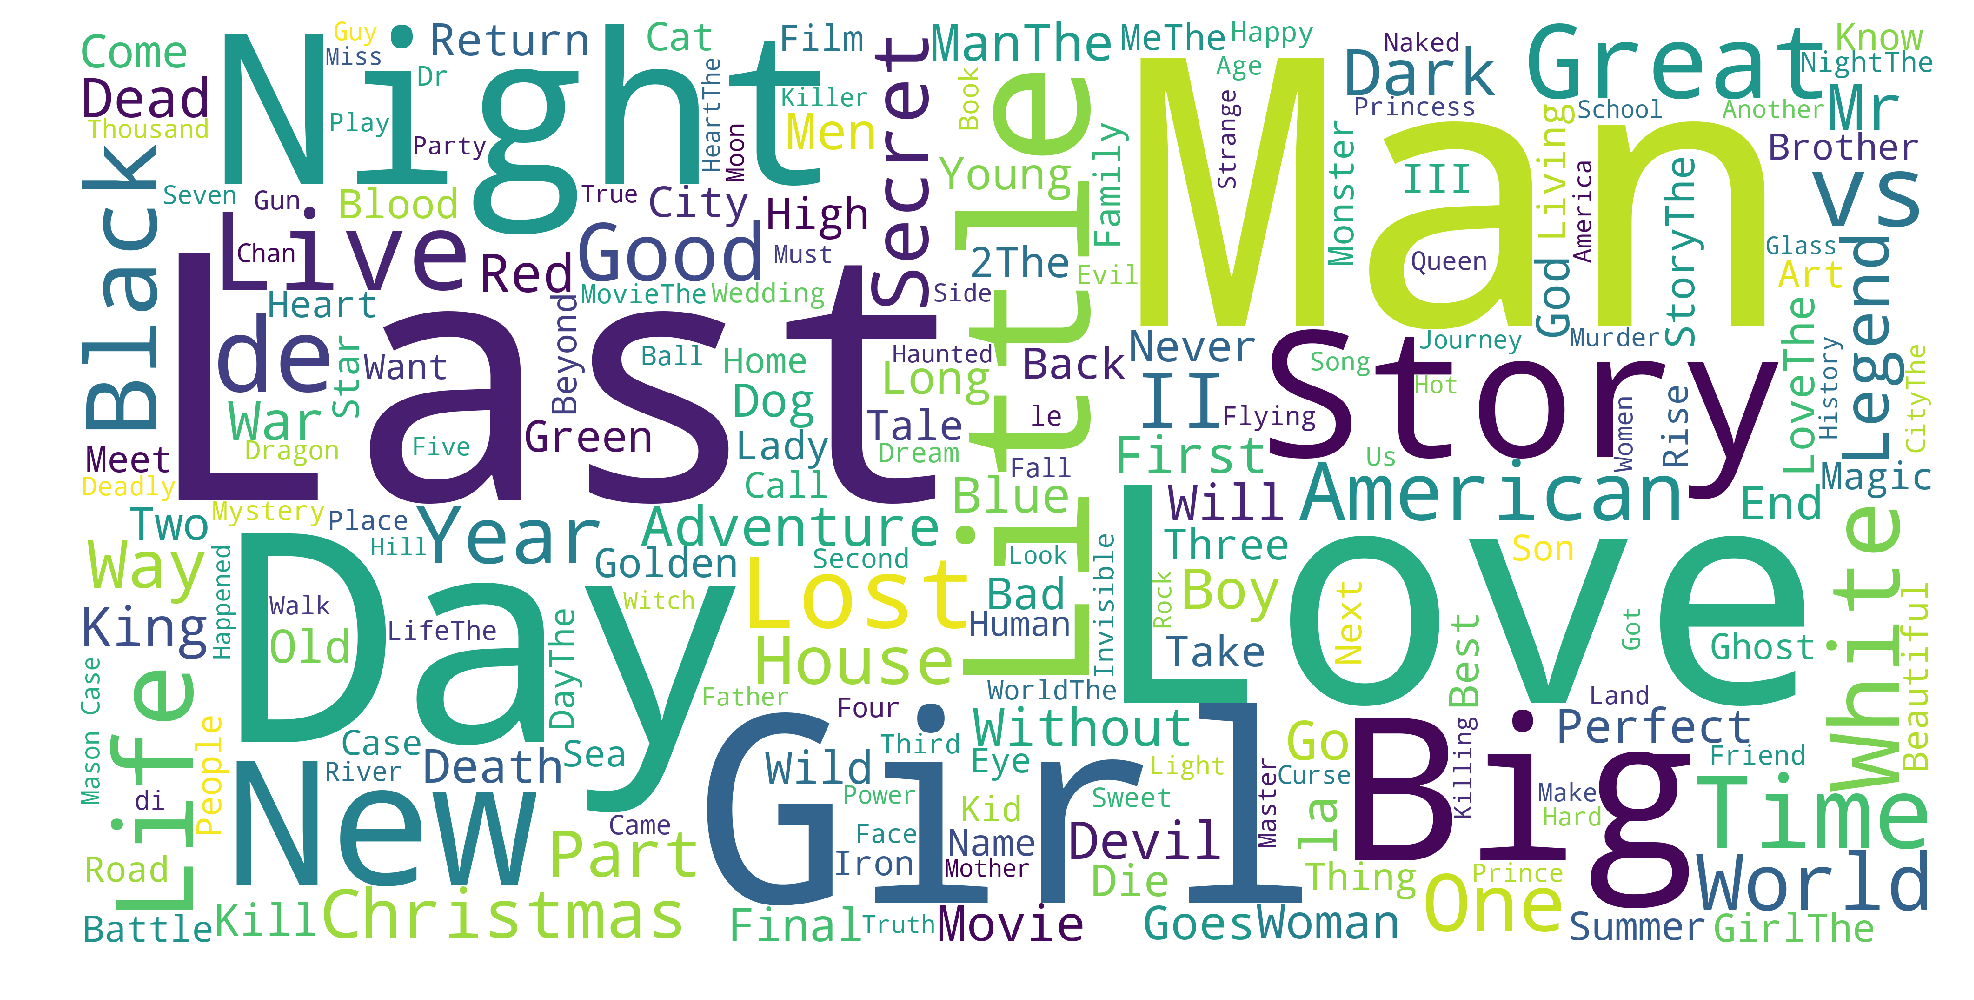

In [65]:
title_wordcloud = title_wordcloud.generate(title_corpus)
plt.figure(figsize=(16,10),dpi=150)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Words 'Love, Last, Man, Day,Girl, Big are among the most commonly occuring words in films titles 

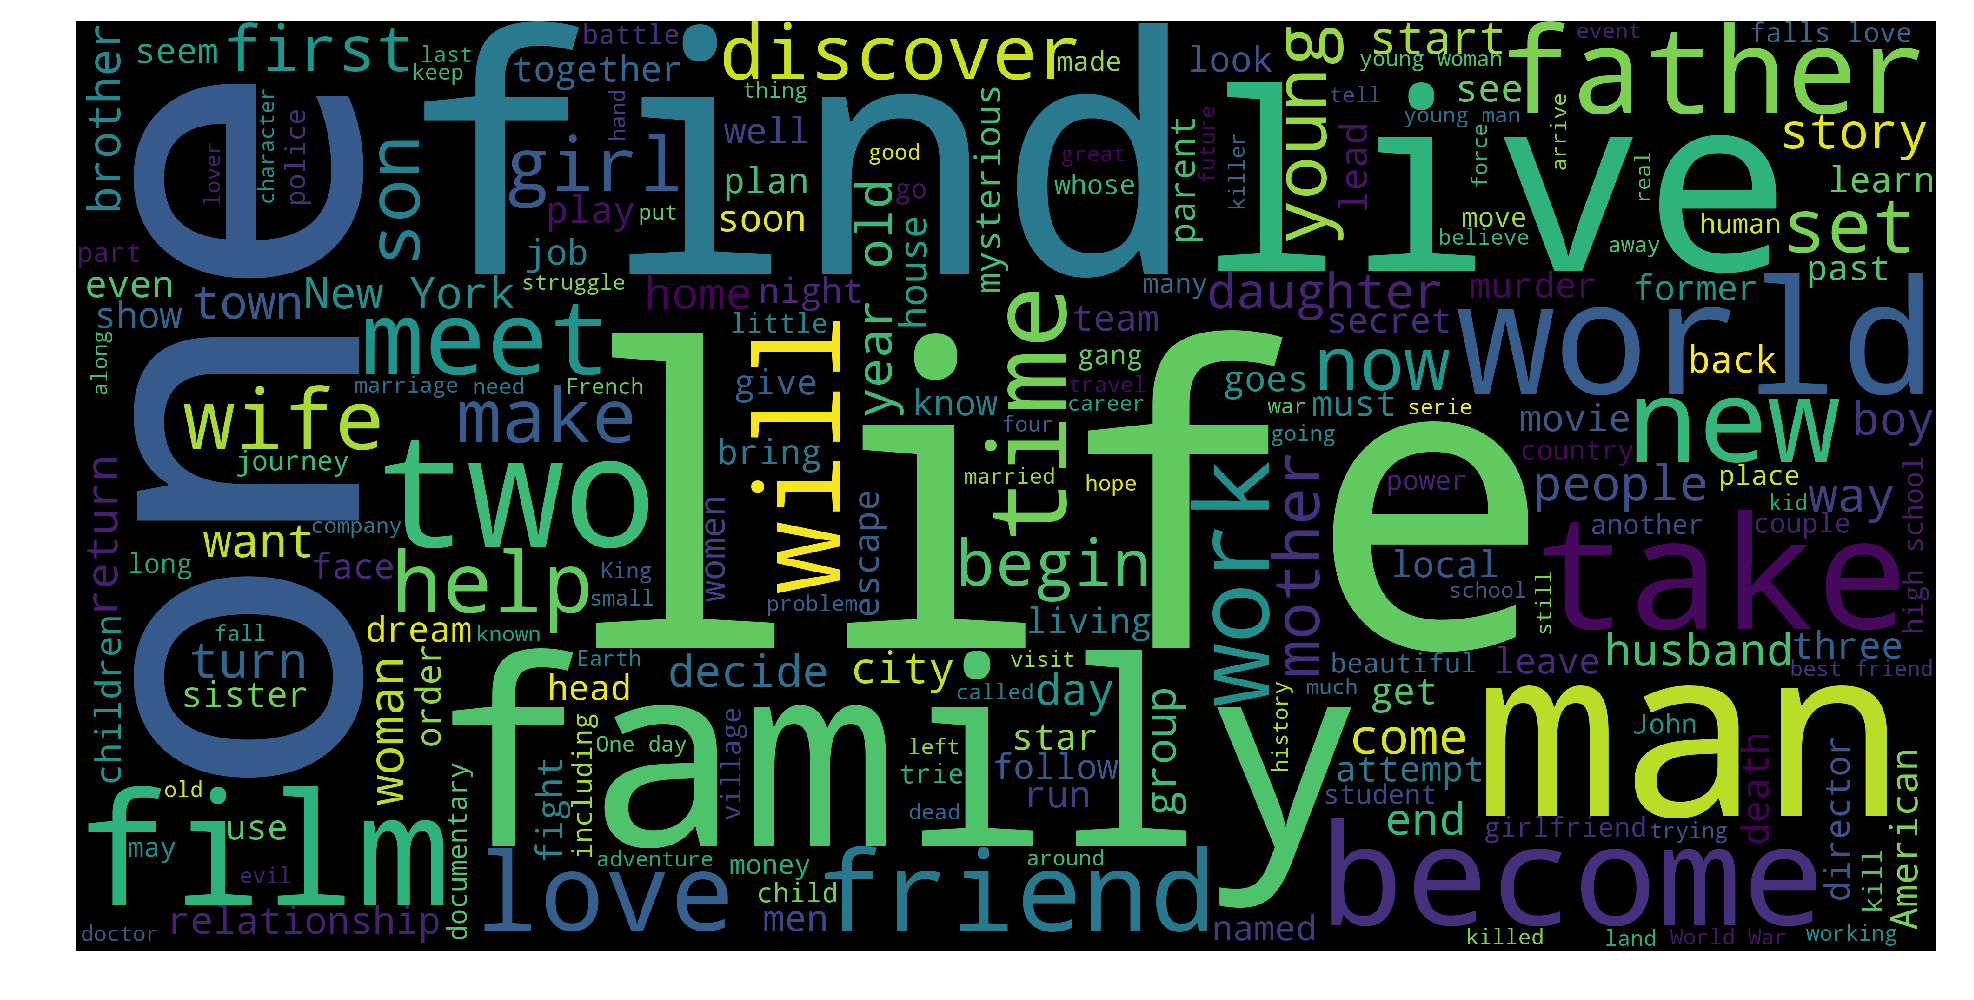

In [66]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS,height=2000,width=4000).generate(overview_corpus)
plt.figure(figsize=(16,10),dpi=150)
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Production countries

In [286]:
df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,<img src='http://image.tmdb.org/t/p/w185//16XO...,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995


In [287]:
df['production_countries'][4],type(df['production_countries'][4])

("[{'iso_3166_1': 'US', 'name': 'United States of America'}]", str)

### as we can see its a string , not list, We need to retrive item in name key

In [288]:
df['production_countries'] =  df['production_countries'].fillna('[]').apply(ast.literal_eval)

In [289]:
df['production_countries'][0]

[{'iso_3166_1': 'US', 'name': 'United States of America'}]

In [290]:
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [291]:
df['production_countries'][:10]

0                    [United States of America]
1                    [United States of America]
2                    [United States of America]
3                    [United States of America]
4                    [United States of America]
5                    [United States of America]
6           [Germany, United States of America]
7                    [United States of America]
8                    [United States of America]
9    [United Kingdom, United States of America]
Name: production_countries, dtype: object

In [292]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [293]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


### As we can see most of the films are made in USA

In [170]:
con_df_without_usa = con_df[con_df['country'] != 'United States of America']

In [188]:
con_df_without_usa.head()

,num_movies,country
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada


In [180]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [192]:
data = dict(type='choropleth',
           locations=con_df_without_usa['country'],
           locationmode = 'country names',
           z=con_df_without_usa['num_movies'],
           colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
           autocolorscale = False,
           reversescale = False,
           text=con_df_without_usa['country'],
           colorbar={'title':'Production Countries'})
layout = dict(title='Production Countries for the MovieLens Movies (Apart from US)',
             geo = dict(showframe=False,
             projection={'type':'mercator'}))


In [193]:
choromap = go.Figure(data=[data],layout=layout)

In [194]:
iplot(choromap)

### Lets see Movie Franchise

In [228]:
df_fran = df[df['belongs_to_collection'].notnull()]

In [229]:
df_fran

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'name': 'Pixar Animation Studios', 'id': 3}]",[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",[United States of America],1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'name': 'Sandollar Productions', 'id': 5842}...",[United States of America],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,en,James Bond must unmask the mysterious head of ...,14.686,<img src='http://image.tmdb.org/t/p/w185//5c0o...,"[{'name': 'United Artists', 'id': 60}, {'name'...","[United Kingdom, United States of America]",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,6.072311,1995
12,"{'id': 117693, 'name': 'Balto Collection', 'po...",NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,en,An outcast half-wolf risks his life to prevent...,12.1407,<img src='http://image.tmdb.org/t/p/w185//gV5P...,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",[United States of America],1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,NaN,1995
18,"{'id': 3167, 'name': 'Ace Ventura Collection',...",30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,9273,en,"Summoned from an ashram in Tibet, Ace finds hi...",8.20545,<img src='http://image.tmdb.org/t/p/w185//wRlG...,"[{'name': 'O Entertainment', 'id': 5682}, {'na...",[United States of America],1995-11-10,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0,7.079518,1995
20,"{'id': 91698, 'name': 'Chili Palmer Collection...",30250000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,8012,en,Chili Palmer is a Miami mobster who gets sent ...,12.6696,<img src='http://image.tmdb.org/t/p/w185//vWtD...,"[{'name': 'Jersey Films', 'id': 216}, {'name':...",[United States of America],1995-10-20,115101622.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,False,6.4,305.0,3.805012,1995
33,"{'id': 9435, 'name': 'Babe Collection', 'poste...",30000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,9598,en,Babe is a little pig who doesn't quite know hi...,14.4048,<img src='http://image.tmdb.org/t/p/w185//gN6X...,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[Australia, United States of America]",1995-07-18,254

In [230]:
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x:x['name'] if isinstance(x,dict) else np.nan)

In [233]:
df_fran['belongs_to_collection']

0                          Toy Story Collection
2                     Grumpy Old Men Collection
4                Father of the Bride Collection
9                         James Bond Collection
12                             Balto Collection
18                       Ace Ventura Collection
20                      Chili Palmer Collection
33                              Babe Collection
43                     Mortal Kombat Collection
47                        Pocahontas Collection
65                 The Lawnmower Man Collection
68                            Friday Collection
69               From Dusk Till Dawn Collection
75                         Screamers Collection
105                       The Muppet Collection
124            The Neverending Story Collection
142                         Bad Boys Collection
150                           Batman Collection
153             Brooklyn Cigar Store Collection
155                           Casper Collection
160                              Mexico 

In [234]:
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [239]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', 
                                 aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [240]:
fran_pivot.head()

,belongs_to_collection,count,mean,sum
0,... Has Fallen Collection,2,183390043.5,366780087.0
1,00 Schneider Filmreihe,0,NaN,0.0
2,08/15 Collection,0,NaN,0.0
3,100 Girls Collection,0,NaN,0.0
4,101 Dalmatians (Animated) Collection,1,215880014.0,215880014.0


### Highest grossing movie franchise

In [241]:
fran_pivot.sort_values('sum',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


### Most successful movie franchise by average box office collection

In [242]:
fran_pivot.sort_values('mean',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


### Franchise with hoghest number of movies

In [243]:
fran_pivot.sort_values('count',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


## Production Companies

In [250]:
df['production_companies'][0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [294]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)

In [304]:
df['production_companies'][0][0]['name']

'Pixar Animation Studios'

In [307]:
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [311]:
df.head(10)['production_companies']

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
5    [Regency Enterprises, Forward Pass, Warner Bros.]
6    [Paramount Pictures, Scott Rudin Productions, ...
7                               [Walt Disney Pictures]
8    [Universal Pictures, Imperial Entertainment, S...
9                    [United Artists, Eon Productions]
Name: production_companies, dtype: object

In [318]:
s= df.apply(lambda x: pd.Series(x['production_companies']),axis=1)

In [319]:
s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TriStar Pictures,Teitler Film,Interscope Communications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Warner Bros.,Lancaster Gate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Twentieth Century Fox Film Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sandollar Productions,Touchstone Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Regency Enterprises,Forward Pass,Warner Bros.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Paramount Pictures,Scott Rudin Productions,Mirage Enterprises,Sandollar Productions,Constellation Entertainment,Worldwide,Mont Blanc Entertainment GmbH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Walt Disney Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Universal Pictures,Imperial Entertainment,Signature Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United Artists,Eon Productions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
s= s.stack()
s

0      0                   Pixar Animation Studios
1      0                          TriStar Pictures
       1                              Teitler Film
       2                 Interscope Communications
2      0                              Warner Bros.
       1                            Lancaster Gate
3      0    Twentieth Century Fox Film Corporation
4      0                     Sandollar Productions
       1                       Touchstone Pictures
5      0                       Regency Enterprises
       1                              Forward Pass
       2                              Warner Bros.
6      0                        Paramount Pictures
       1                   Scott Rudin Productions
       2                        Mirage Enterprises
       3                     Sandollar Productions
       4               Constellation Entertainment
       5                                 Worldwide
       6             Mont Blanc Entertainment GmbH
7      0                      W

In [321]:
s = s.reset_index(level=1,drop=True)

In [323]:
s.head(10)

0                   Pixar Animation Studios
1                          TriStar Pictures
1                              Teitler Film
1                 Interscope Communications
2                              Warner Bros.
2                            Lancaster Gate
3    Twentieth Century Fox Film Corporation
4                     Sandollar Productions
4                       Touchstone Pictures
5                       Regency Enterprises
dtype: object

In [325]:
s.name = 'companies'     #before joining series should have a name

In [326]:
com_df = df.drop('production_companies',axis=1).join(s)

In [327]:
com_df.head(10)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,companies
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Pixar Animation Studios
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,TriStar Pictures
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Teitler Film
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Interscope Communications
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,[United States of America],1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Warner Bros.
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,[United States of America],1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Lancaster Gate
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,<img src='http://image.tmdb.org/t/p/w185//16XO...,[United States of America],1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,Twentieth Century Fox Film Corporation
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,<img src='http://image.tmdb.org/t/p/w185//e64s...,[United States of America],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995,Sandollar Productions
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,<img src='http://image.tmdb.org/t/p/w185//e64s...,[United States of America],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Bac

In [328]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))

In [330]:
com_sum.columns=['Total Revenue']

In [338]:
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average Revenue']

In [339]:
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number of Movies']

In [340]:
com_pivot = pd.concat([com_sum , com_mean, com_count],axis=1).sort_values('Total Revenue',ascending=False)

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [341]:
com_pivot.head(10)

,Total Revenue,Average Revenue,Number of Movies
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


#### Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500 movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion dollars and 48 billion dollars in revenue respectively.

### Most successful by average revenue

In [343]:
com_pivot[com_pivot['Number of Movies'] > 15].sort_values('Average Revenue',ascending=False).head(10)

,Total Revenue,Average Revenue,Number of Movies
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40
1492 Pictures,5.470574e+09,3.217985e+08,17


#### Pixar is most successful production house with every movie generating  $621 millions on average

## Original Language

##### In this section, let us look at the languages of the movies in our dataset. From the production countries, we have already deduced that the majority of the movies in the dataset are English. Let us see what the other major languages represented are.

In [345]:
df.head(2)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995


In [369]:
df['original_language'].drop_duplicates().shape[0]

93

##### There are total 93 languages

In [358]:
language_df = pd.DataFrame(df['original_language'].value_counts())

In [359]:
language_df['language'] = language_df.index
language_df.columns = ['Number of movies','Language']

In [360]:
language_df.head(10)

,Number of movies,Language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de
es,994,es
ru,826,ru
hi,508,hi
ko,444,ko
zh,409,zh


In [368]:
language_df[1:11].iplot(kind='bar',x='Language',y='Number of movies')

## Popularity, Vote Average and Vote Count

In [370]:
df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995


In [376]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [379]:
df['popularity'] = df['popularity'].apply(clean_numeric)
df['vote_count'] = df['vote_count'].apply(clean_numeric)
df['vote_average'] = df['vote_average'].apply(clean_numeric)

In [380]:
df.popularity.describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



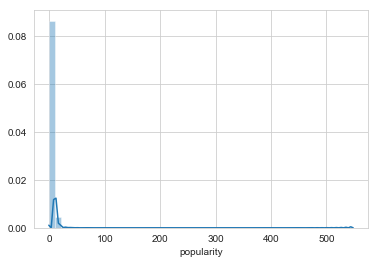

In [385]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))

In [383]:
df[['title','popularity','year']].sort_values('popularity',ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


#### Minions is the most popular movie by the TMDB Popularity Score. Wonder Woman and Beauty and the Beast, two extremely successful woman centric movies come in second and third respectively.

### Most voted

In [387]:
df[['title','vote_count','year']].sort_values('vote_count',ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


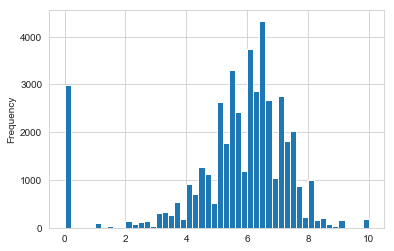

In [395]:
df['vote_average'].plot(kind='hist',bins=50)

### Most critically accaimed movies

In [398]:
df[['title','vote_average','year','vote_count']].sort_values('vote_average',ascending=False).head(10)

,title,vote_average,year,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.0,2005,1.0
15710,If God Is Willing and da Creek Don't Rise,10.0,2010,1.0
22396,Meat the Truth,10.0,2008,1.0
22395,Marvin Hamlisch: What He Did For Love,10.0,2013,1.0
35343,Elaine Stritch: At Liberty,10.0,2002,1.0
186,Reckless,10.0,1995,1.0
45047,The Human Surge,10.0,2016,1.0
22377,The Guide,10.0,2011,1.0
22346,هیچ کجا هیچ کس,10.0,2013,1.0
1634,Other Voices Other Rooms,10.0,1995,1.0


### Issue with above list is that vote count is only 1, so they are actually voted by only 1 viewer. So we need to set a lower threshold for vote count

In [400]:
df[df['vote_count']>1000][['title','vote_average','year','vote_count']].sort_values('vote_average',ascending=False).head(10)

,title,vote_average,year,vote_count
314,The Shawshank Redemption,8.5,1994,8358.0
40251,Your Name.,8.5,2016,1030.0
834,The Godfather,8.5,1972,6024.0
1152,One Flew Over the Cuckoo's Nest,8.3,1975,3001.0
1176,Psycho,8.3,1960,2405.0
1178,The Godfather: Part II,8.3,1974,3418.0
1184,Once Upon a Time in America,8.3,1984,1104.0
522,Schindler's List,8.3,1993,4436.0
5481,Spirited Away,8.3,2001,3968.0
292,Pulp Fiction,8.3,1994,8670.0


#### The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores.

### Is there a relation between popularity and vote_average

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



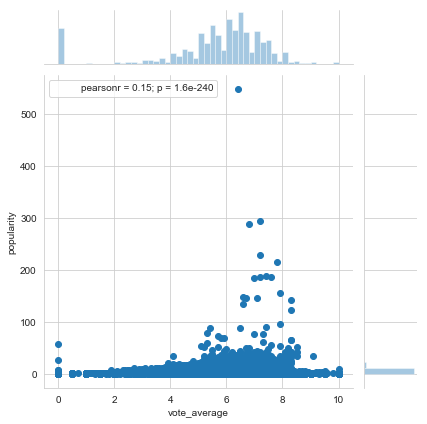

In [403]:
j= sns.jointplot(x='vote_average',y = 'popularity',data=df)
j.annotate(stats.pearsonr)
plt.show()

##### Since the pearsonr coeficient is 0.15 there is no tangible relation between them

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



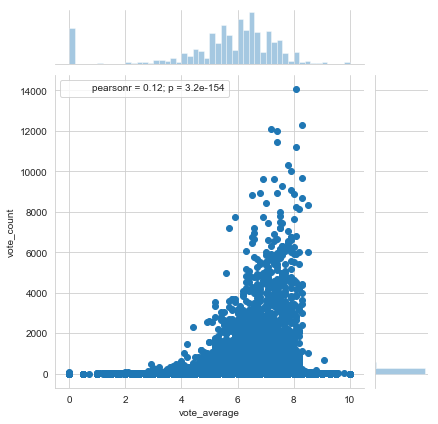

In [404]:
j = sns.jointplot(x='vote_average',y='vote_count',data=df)
j.annotate(stats.pearsonr)
plt.show()

#### Low pearsonr coefficient showsa that high vote count doesnt imply movie is good

## Movie release dates

In [435]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
               'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [407]:
df.head(2)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995


In [411]:
df['release_date'][0]

'1995-10-30'

In [412]:
ff = pd.to_datetime(df['release_date'][0])

In [416]:
ff.month_name()

'October'

In [425]:
ff.day_name()

'Monday'

In [419]:
def get_month(x):
    try:
        date = pd.to_datetime(x)
        month = date.month_name()
        
        return month
    except:
        return np.nan
    

In [420]:
get_month(df['release_date'][0])

'October'

In [421]:
df['release_month'] =df['release_date'].apply(get_month)

In [422]:
df['release_month'].value_counts()

January      5912
September    4838
October      4615
December     3786
November     3661
March        3553
April        3453
August       3394
May          3339
June         3153
February     3032
July         2640
Name: release_month, dtype: int64

In [426]:
def get_day(x):
    try:
        date = pd.to_datetime(x)
        day = date.day_name()
        
        return day
    except:
        return np.nan
    

In [427]:
df['day_of_week'] = df['release_date'].apply(get_day)

In [428]:
df['day_of_week'].value_counts()

Friday       13908
Thursday      7525
Wednesday     7035
Saturday      5151
Tuesday       4641
Sunday        3613
Monday        3503
Name: day_of_week, dtype: int64

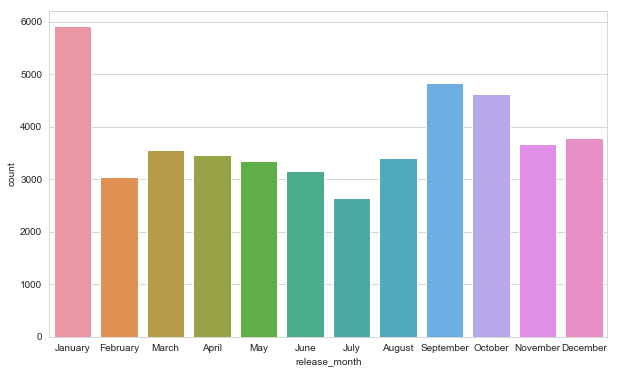

In [436]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_month',data=df,order=month_order)

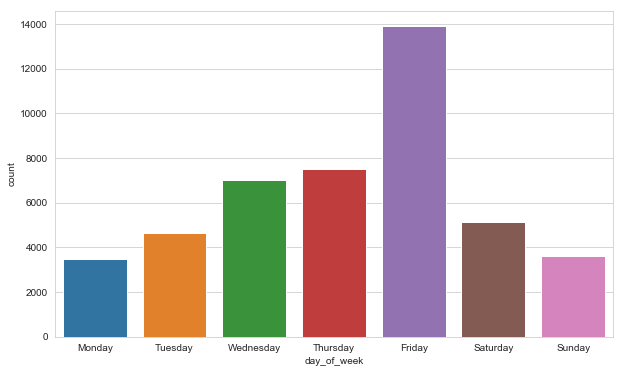

In [437]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week',data=df,order=day_order)

### Clearly it can be seen that highest number of movies are released on friday

(0, 12)

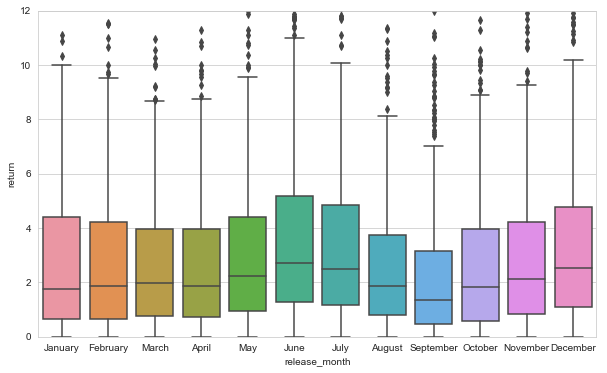

In [444]:
plt.figure(figsize=(10,6))
sns.boxplot(x='release_month',y='return',data=df[df['return'].notnull()],order=month_order)
plt.ylim([0,12])

(0, 12)

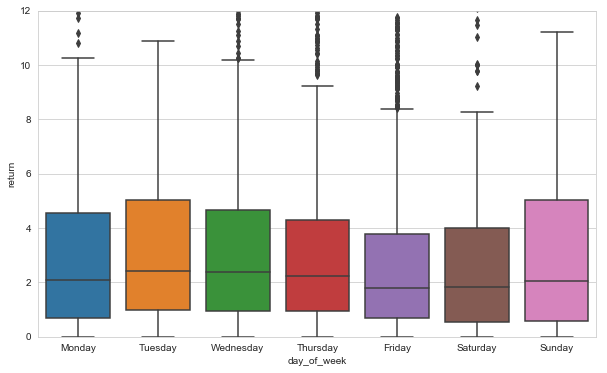

In [446]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week',y='return',data=df[df['return'].notnull()],order=day_order)
plt.ylim([0,12])

In [467]:
year_count = df.groupby('year')['title'].count()

In [468]:
year_count.iplot(xrange=(1900,2020))

In [478]:
df[df['year'] != 'nan'].sort_values('year',ascending=True)[['title','year']].head(10)

,title,year
19730,nan,1
29503,nan,12
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34938,Traffic Crossing Leeds Bridge,1888
34934,Accordion Player,1888
34939,London's Trafalgar Square,1890
34936,"Monkeyshines, No. 2",1890


In [485]:
df_21 = df.copy()

In [488]:
df_21['year']  = df_21['year'].apply(lambda x: int(x) if len(x)==4  else np.nan)

In [494]:
df_21 = df_21[df_21['year']>2000.0]

In [496]:
df_21['year'].value_counts()

2014.0    1974
2015.0    1905
2013.0    1889
2012.0    1722
2011.0    1667
2016.0    1604
2009.0    1586
2010.0    1501
2008.0    1473
2007.0    1320
2006.0    1270
2005.0    1125
2004.0     992
2002.0     905
2003.0     882
2001.0     865
2017.0     532
2018.0       5
2020.0       1
Name: year, dtype: int64

In [497]:
df.head(2)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,October,Monday
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,December,Friday


In [510]:
heat = pd.pivot_table(data=df_21,values='title',columns='year',index='release_month',aggfunc='count')

In [518]:
heat= heat.reindex(month_order)
heat = heat.fillna(0)
heat

year,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2020.0
release_month,,,,,,,,,,,,,,,,,,,
January,159.0,163.0,141.0,170.0,184.0,171.0,206.0,242.0,231.0,173.0,157.0,142.0,160.0,158.0,171.0,144.0,89.0,0.0,0.0
February,48.0,55.0,53.0,69.0,58.0,69.0,92.0,111.0,124.0,107.0,107.0,100.0,124.0,134.0,141.0,133.0,72.0,0.0,0.0
March,67.0,71.0,61.0,69.0,86.0,112.0,94.0,96.0,113.0,95.0,134.0,163.0,160.0,165.0,157.0,143.0,93.0,1.0,0.0
April,55.0,52.0,66.0,68.0,84.0,94.0,94.0,90.0,129.0,105.0,138.0,121.0,162.0,206.0,171.0,163.0,77.0,2.0,0.0
May,43.0,69.0,78.0,79.0,88.0,77.0,102.0,75.0,100.0,127.0,95.0,121.0,121.0,141.0,139.0,115.0,68.0,0.0,0.0
June,54.0,63.0,55.0,60.0,80.0,103.0,95.0,85.0,94.0,115.0,106.0,124.0,132.0,134.0,149.0,115.0,66.0,0.0,0.0
July,40.0,47.0,46.0,52.0,68.0,66.0,71.0,93.0,75.0,81.0,103.0,90.0,122.0,112.0,125.0,107.0,33.0,0.0,0.0
August,68.0,55.0,80.0,63.0,69.0,92.0,97.0,124.0,110.0,104.0,102.0,148.0,144.0,174.0,157.0,115.0,18.0,0.0,0.0
September,109.0,98.0,104.0,125.0,144.0,160.0,165.0,164.0,190.0,173.0,247.0,238.0,232.0,241.0,198.0,170.0,4.0,0.0,0.0


In [523]:
for i in heat.columns:
    
    heat[i] = heat[i].apply(lambda x:int(x))
    

In [526]:
heat = heat.transpose()
heat

release_month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2001.0,159,48,67,55,43,54,40,68,109,87,68,67
2002.0,163,55,71,52,69,63,47,55,98,96,68,68
2003.0,141,53,61,66,78,55,46,80,104,78,57,63
2004.0,170,69,69,68,79,60,52,63,125,92,77,68
2005.0,184,58,86,84,88,80,68,69,144,95,89,80
2006.0,171,69,112,94,77,103,66,92,160,139,95,92
2007.0,206,92,94,94,102,95,71,97,165,122,100,82
2008.0,242,111,96,90,75,85,93,124,164,170,112,111
2009.0,231,124,113,129,100,94,75,110,190,184,140,96


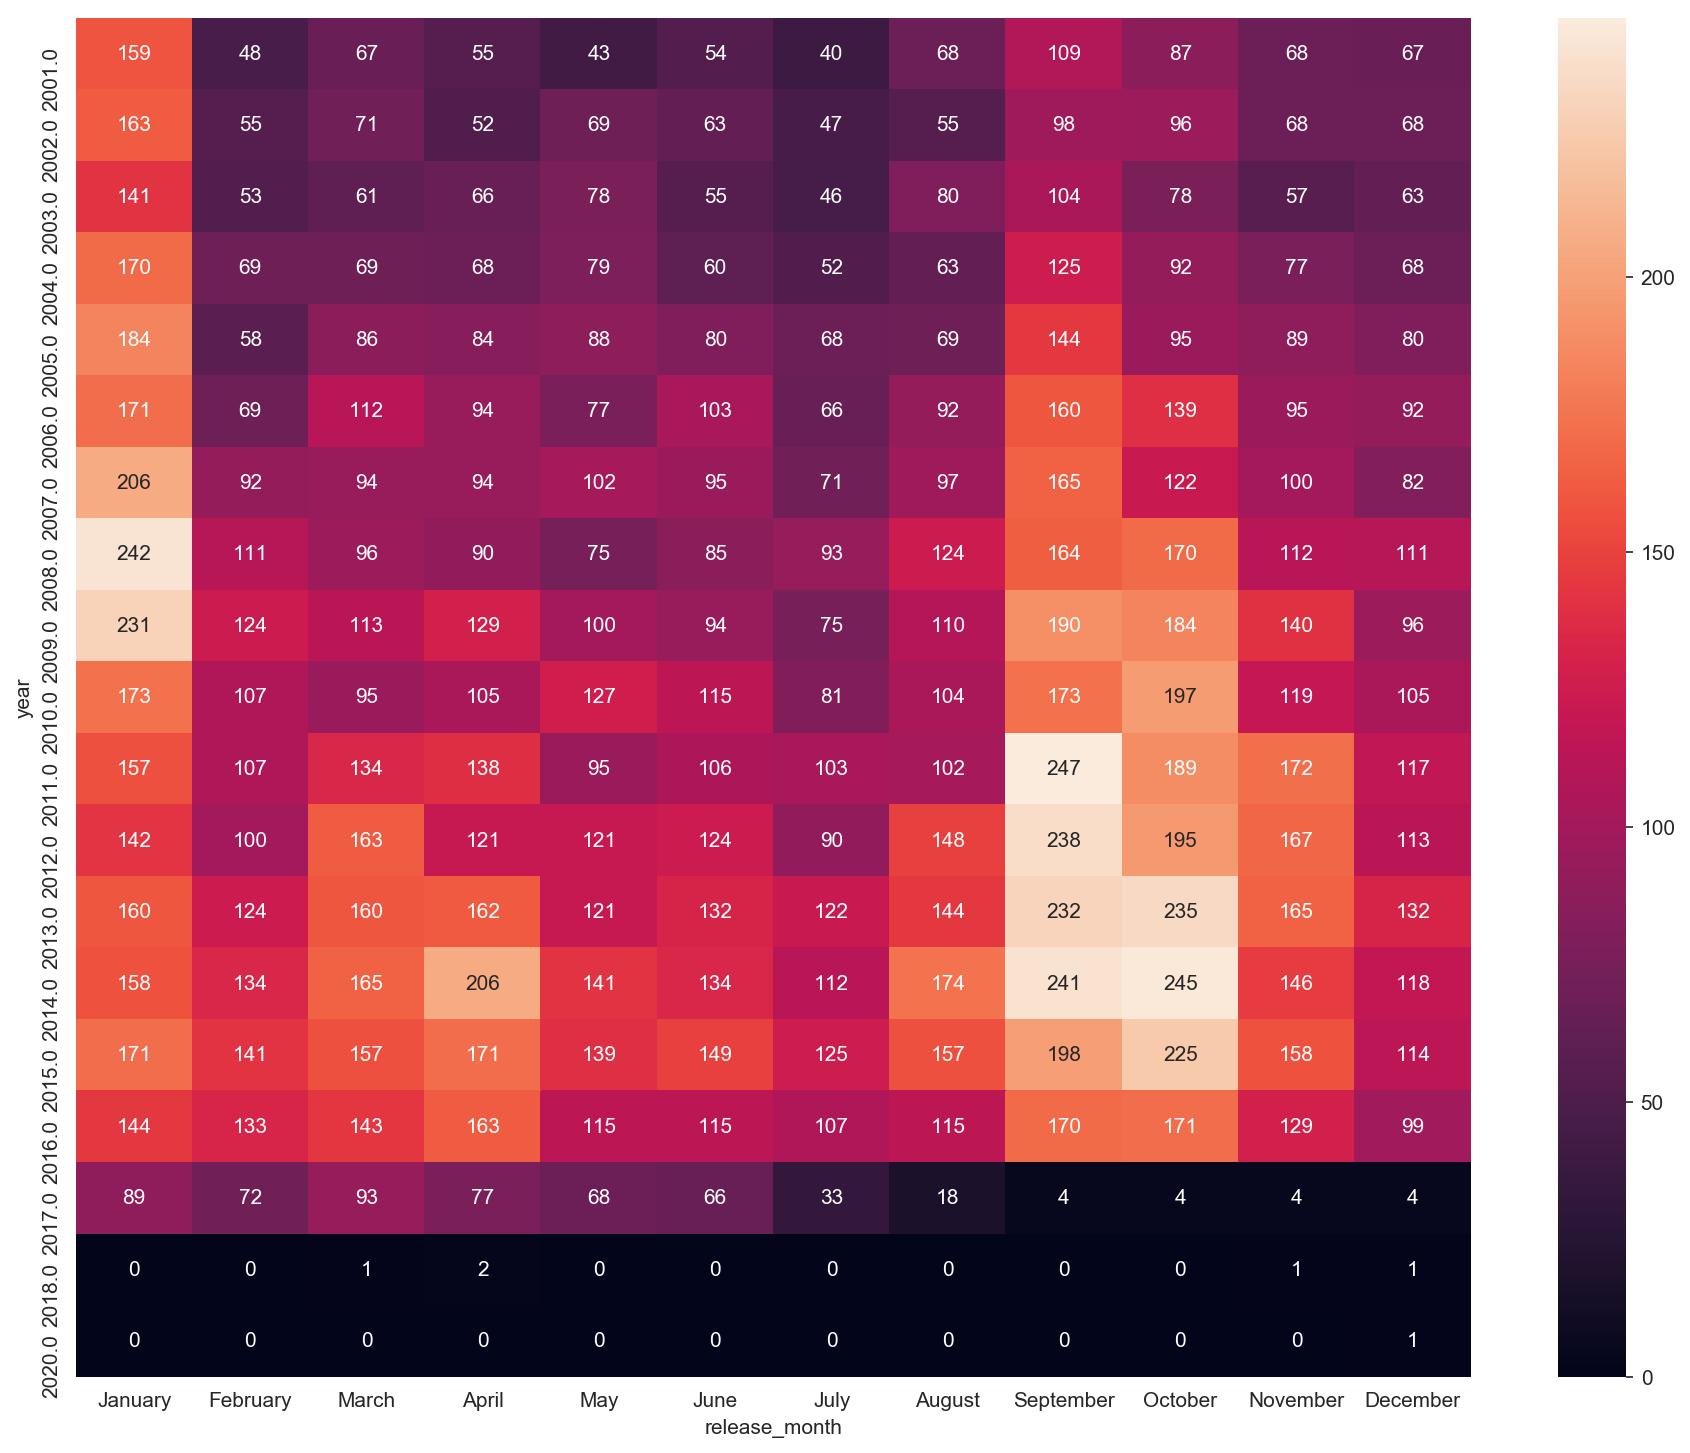

In [528]:
plt.figure(figsize=(15,12),dpi=150)
sns.heatmap(heat,annot=True,fmt='n')

### Runtime

In [529]:
df.head(2)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,October,Monday
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,December,Friday


In [531]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [532]:
df['runtime'].isnull().sum()

263

#### Shortest movies

In [534]:
df[df['runtime']>0].sort_values('runtime').head(10)[['title','runtime','year']]

,title,runtime,year
35146,La Vague,1.0,1891
36577,Champs de Mars,1.0,1900
36576,Palace of Electricity,1.0,1900
44965,"Luis Martinetti, Contortionist",1.0,1894
42357,A Gathering of Cats,1.0,2007
36575,Eiffel Tower from Trocadero Palace,1.0,1900
36574,Panorama of Eiffel Tower,1.0,1900
44714,The Infernal Caldron,1.0,1903
19244,The Kiss,1.0,1896
44646,The Vanishing Lady,1.0,1896


#### Longest Movies

In [535]:
df[df['runtime']>0].sort_values('runtime',ascending=False).head(10)[['title','runtime','year']]

,title,runtime,year
24178,Centennial,1256.0,1978
40938,Baseball,1140.0,1994
19965,Jazz,1140.0,2001
13767,Berlin Alexanderplatz,931.0,1980
13953,Heimat: A Chronicle of Germany,925.0,1984
27855,The Story of Film: An Odyssey,900.0,2011
26682,Taken,877.0,2002
19158,The War,874.0,2007
34667,The Roosevelts: An Intimate History,840.0,2014
34732,Seventeen Moments in Spring,840.0,1973


### budget

In [536]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [539]:
df.sort_values('budget',ascending=False)[['title','year','budget','revenue','return']].head(10)

,title,year,budget,revenue,return
17124,Pirates of the Caribbean: On Stranger Tides,2011,380000000.0,1.045714e+09,2.751878
11827,Pirates of the Caribbean: At World's End,2007,300000000.0,9.610000e+08,3.203333
26558,Avengers: Age of Ultron,2015,280000000.0,1.405404e+09,5.019299
11067,Superman Returns,2006,270000000.0,3.910812e+08,1.448449
44842,Transformers: The Last Knight,2017,260000000.0,6.049421e+08,2.326701
16130,Tangled,2010,260000000.0,5.917949e+08,2.276134
18685,John Carter,2012,260000000.0,2.841391e+08,1.092843
11780,Spider-Man 3,2007,258000000.0,8.908716e+08,3.452991
21175,The Lone Ranger,2013,255000000.0,8.928991e+07,0.350157
22059,The Hobbit: The Desolation of Smaug,2013,250000000.0,9.584000e+08,3.833600


#### Apart from the lone ranger every other big budget film in top 10 has been box office success

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



<function matplotlib.pyplot.show(*args, **kw)>

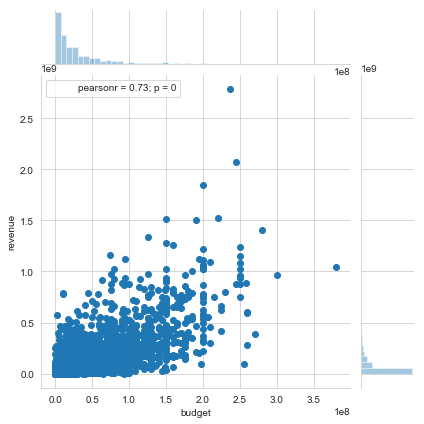

In [540]:
j = sns.jointplot(x='budget',y='revenue',data=df)
j.annotate(stats.pearsonr)
plt.show

### Pearson coefficient of 0.73 shows there is strong correlation between budget and revenue

### Highest grossing movies of all time

In [542]:
gross_top = df[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [543]:
pd.set_option('display.max_colwidth', 50)

In [552]:
year_rev = df[df['revenue'].notnull()].groupby('year')['year','revenue'].max()

In [557]:
year_rev['revenue'].iplot(xrange=(1900,2020))

### Most successful in terms of return

In [564]:
df[df['budget']> 1e6][['title','revenue','budget','return','year']].sort_values('return',ascending=False).head(15)

,title,revenue,budget,return,year
1003,Alice in Wonderland,572000000.0,3000000.0,190.666667,1951
587,Snow White and the Seven Dwarfs,184925486.0,1488423.0,124.242561,1937
893,Gone with the Wind,400176459.0,4000000.0,100.044115,1939
21344,Lost in Thailand,208000000.0,2200000.0,94.545455,2012
2542,The Rocky Horror Picture Show,112892319.0,1200000.0,94.076932,1975
993,Cinderella,263591415.0,2900000.0,90.893591,1950
8230,Saw,103911669.0,1200000.0,86.593058,2004
1065,E.T. the Extra-Terrestrial,792965326.0,10500000.0,75.520507,1982
5165,My Big Fat Greek Wedding,368744044.0,5000000.0,73.748809,2002
1563,The Full Monty,257850122.0,3500000.0,73.671463,1997


#### for a film with more than $1million budget, Alice in Wonderland is the most successful movie with return rat of 190.66

### Box office Disasters

In [565]:
 df[df['budget']> 1e6][['title','revenue','budget','return','year']].sort_values('return',ascending=True).head(15)

,title,revenue,budget,return,year
7016,Chasing Liberty,12.0,23000000.0,5.217391e-07,2004
8107,The Cookout,12.0,16000000.0,7.500000e-07,2004
2663,Never Talk to Strangers,6.0,6400000.0,9.375000e-07,1995
12946,To Rob a Thief,6.0,4002313.0,1.499133e-06,2007
17527,Deadfall,18.0,10000000.0,1.800000e-06,1993
6736,In the Cut,23.0,12000000.0,1.916667e-06,2003
2882,Dreaming of Joseph Lees,7.0,2000000.0,3.500000e-06,1999
11918,Death at a Funeral,46.0,9000000.0,5.111111e-06,2007
11653,Zyzzyx Road,30.0,2000000.0,1.500000e-05,2006
22271,A Perfect Man,388.0,5000000.0,7.760000e-05,2013


#### For a movie with more than $1 million budget Chasing liberty is the most unsuccessful movie

In [610]:
def get_year(x):
    try:
        return pd.to_numeric(x)
    except:
        return np.nan

df['year'] = df['year'].apply(get_year)

## Genre

In [566]:
df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,October,Monday
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,December,Friday
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,December,Friday
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,December,Friday
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995,February,Friday


In [ ]:
df['genres'] = df['genres'].apply(ast.literal_eval)

In [ ]:
df['genres'] = df['genres'].apply(lambda x: [i['name']for i in x] if isinstance(x,list) else np.nan)

In [614]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [615]:
genre_df = df.drop('genres',axis=1).join(s)

In [616]:
pop_df = pd.DataFrame(genre_df['genre'].value_counts())
pop_df.head()

,genre
Drama,20265
Comedy,13182
Thriller,7624
Romance,6735
Action,6596


In [617]:
pop_df = pop_df.reset_index()

In [618]:
pop_df.columns = ['Genre','Movies']

In [619]:
pop_df

,Genre,Movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


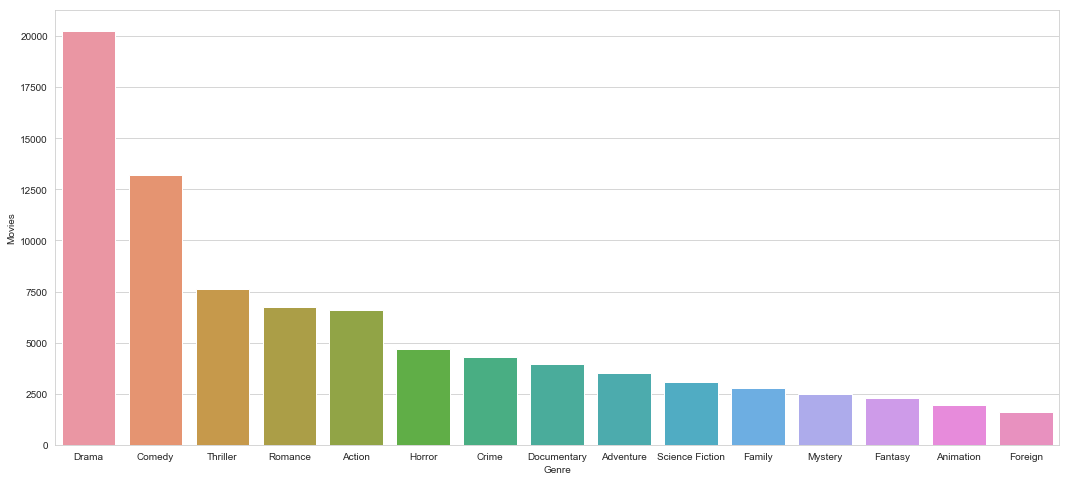

In [620]:
plt.figure(figsize=(18,8))
sns.barplot(x='Genre', y='Movies', data=pop_df.head(15))

In [621]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 
          'Mystery', 'Fantasy', 'Mystery', 'Animation']

In [623]:
pop_gen_movies = genre_df[(genre_df['genre'].isin(genres)) & (genre_df['year'] >= 2000.0) & (genre_df['year'] <= 2017.0)]

In [624]:
pop_gen_movies

,belongs_to_collection,budget,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week,genre
707,NaN,NaN,NaN,131232,en,"Two Sicilian friends, Nunzio and Pino, share t...",0.003949,<img src='http://image.tmdb.org/t/p/w185//jo4n...,[],[Italy],2002-03-20,NaN,86.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Two Friends,False,0.0,0.0,NaN,2002.0,March,Wednesday,Drama
868,NaN,NaN,NaN,79782,en,An atmospheric coming-of-age story featuring a...,0.147130,<img src='http://image.tmdb.org/t/p/w185//lUmJ...,[],[],2010-05-25,NaN,110.0,"[{'iso_639_1': 'pl', 'name': 'Polski'}]",Released,NaN,Venice,False,7.5,4.0,NaN,2010.0,May,Tuesday,Drama
868,NaN,NaN,NaN,79782,en,An atmospheric coming-of-age story featuring a...,0.147130,<img src='http://image.tmdb.org/t/p/w185//lUmJ...,[],[],2010-05-25,NaN,110.0,"[{'iso_639_1': 'pl', 'name': 'Polski'}]",Released,NaN,Venice,False,7.5,4.0,NaN,2010.0,May,Tuesday,Romance
1081,NaN,NaN,NaN,141210,en,"The town of Derry has a secret, but no one tol...",0.135596,<img src='http://image.tmdb.org/t/p/w185//pQpy...,[],[],2013-10-12,NaN,6.0,[],Released,NaN,The Sleepover,False,8.0,1.0,NaN,2013.0,October,Saturday,Comedy
1081,NaN,NaN,NaN,141210,en,"The town of Derry has a secret, but no one tol...",0.135596,<img src='http://image.tmdb.org/t/p/w185//pQpy...,[],[],2013-10-12,NaN,6.0,[],Released,NaN,The Sleepover,False,8.0,1.0,NaN,2013.0,October,Saturday,Horror
2114,NaN,NaN,http://www.thefarmerswifefilm.co.uk/,143750,en,"As her surroundings are invaded by outsiders, ...",0.211754,<img src='http://image.tmdb.org/t/p/w185//ePPN...,[],[],2012-06-20,NaN,18.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Farmer's Wife,False,10.0,1.0,NaN,2012.0,June,Wednesday,Drama
2654,NaN,NaN,https://www.miramax.com/movie/the-yards,19457,en,"In the rail yards of Queens, contractors repai...",11.162383,<img src='http://image.tmdb.org/t/p/w185//AtwX...,"[Miramax Films, Industry Entertainment]",[United States of America],2000-04-27,NaN,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,He's the target of the most merciless family i...,The Yards,False,6.0,98.0,NaN,2000.0,April,Thursday,Drama
2654,NaN,NaN,https://www.miramax.com/movie/the-yards,19457,en,"In the rail yards of Queens, contractors repai...",11.162383,<img src='http://image.tmdb.org/t/p/w185//AtwX...,"[Miramax Films, Industry Entertainment]",[United States of America],2000-04-27,NaN,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,He's the target of the most merciless family i...,The Yards,False,6.0,98.0,NaN,2000.0,April,Thursday,Action
2654,NaN,NaN,https://www.miramax.com/movie/the-yards,19457,en,"In the rail yards of Queens, contractors repai...",11.162383,<img src='http://image.tmdb.org/t/p/w185//AtwX...,"[Miramax Films, Industry Entertainment]",[United States of America],2000-04-27,NaN,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,He's the target of the most merciless family i...,The Yards,False,6.0,98.0,NaN,2000.0,April,Thursday,Thriller
2654,NaN,NaN,https://www.miramax.com/movie/the-yards,19457,en,"In the rail yards of Queens, contractors repai...",11.162383,<img src='http://image.tmdb.org/t/p/w185//AtwX...,"[Miramax Films, Industry Entertainment]",[United States of America],2000-04-27,NaN,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,He's the target of the most merciless family i...,The Yards,False,6.0,98.0,NaN,2000.0,April,Thursday,Crime


In [631]:
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre'])
ctab

genre,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller
year,,,,,,,,,,,,
2000.0,109,47,44,260,74,394,39,66,42,155,46,137
2001.0,150,64,42,270,86,408,51,64,42,162,68,156
2002.0,161,72,50,270,93,456,47,68,62,153,69,183
2003.0,150,70,47,297,88,395,34,71,42,138,64,182
2004.0,155,82,47,307,76,494,45,96,47,167,66,167
2005.0,156,70,48,347,98,563,62,113,57,189,62,195
2006.0,173,96,74,377,114,596,72,150,70,200,73,268
2007.0,189,80,71,371,127,620,63,169,61,197,74,250
2008.0,233,119,79,410,121,655,73,180,83,190,92,285


In [633]:
ctab= ctab.apply(lambda x:x/x.sum(),axis=1)
ctab

genre,Action,Adventure,Animation,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller
year,,,,,,,,,,,,
2000.0,0.077141,0.033263,0.031139,0.184006,0.052371,0.278839,0.027601,0.046709,0.029724,0.109696,0.032555,0.096957
2001.0,0.095969,0.040947,0.026871,0.172745,0.055022,0.261036,0.032630,0.040947,0.026871,0.103647,0.043506,0.099808
2002.0,0.095606,0.042755,0.029691,0.160333,0.055226,0.270784,0.027910,0.040380,0.036817,0.090855,0.040974,0.108670
2003.0,0.095057,0.044360,0.029785,0.188213,0.055767,0.250317,0.021546,0.044994,0.026616,0.087452,0.040558,0.115336
2004.0,0.088622,0.046884,0.026872,0.175529,0.043453,0.282447,0.025729,0.054889,0.026872,0.095483,0.037736,0.095483
2005.0,0.079592,0.035714,0.024490,0.177041,0.050000,0.287245,0.031633,0.057653,0.029082,0.096429,0.031633,0.099490
2006.0,0.076447,0.042422,0.032700,0.166593,0.050376,0.263367,0.031816,0.066284,0.030932,0.088378,0.032258,0.118427
2007.0,0.083187,0.035211,0.031250,0.163292,0.055898,0.272887,0.027729,0.074384,0.026849,0.086708,0.032570,0.110035
2008.0,0.092460,0.047222,0.031349,0.162698,0.048016,0.259921,0.028968,0.071429,0.032937,0.075397,0.036508,0.113095


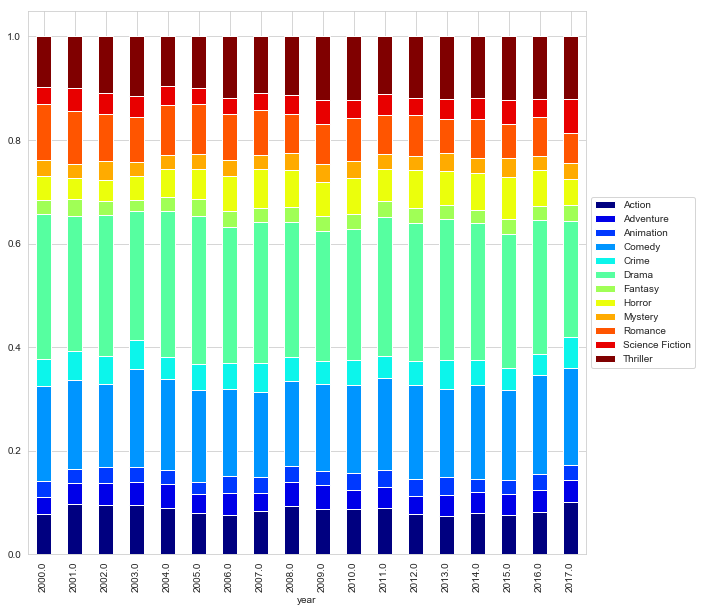

In [642]:
ctab.plot(kind='bar',stacked=True,figsize=(10,10),colormap='jet')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

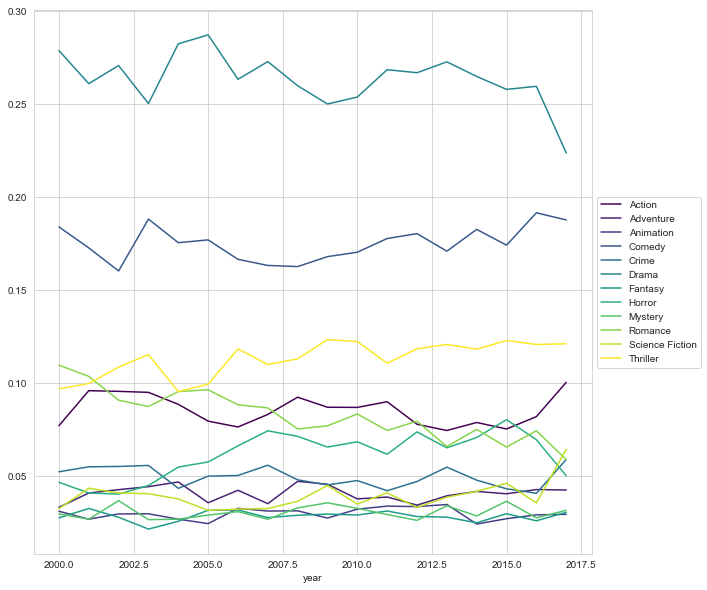

In [646]:
ctab.plot(kind='line',stacked=False,figsize=(10,10),colormap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Cast and Crew

In [647]:
credits_df = pd.read_csv('credits.csv')

In [648]:
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [649]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [651]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [654]:
credits_df['id'] = credits_df['id'].apply(convert_int)

In [655]:
credits_df[credits_df['id'].isnull()]

,cast,crew,id


In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 25 columns):
belongs_to_collection    4494 non-null object
budget                   8890 non-null float64
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
original_language        45455 non-null object
overview                 45466 non-null object
popularity               45460 non-null float64
poster_path              45080 non-null object
production_companies     45466 non-null object
production_countries     45466 non-null object
release_date             45379 non-null object
revenue                  7408 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null object
tagline                  20412 non-null object
title                    45466 non-null object
video                    45460 non-null objec

In [659]:
df['id'] = df['id'].apply(convert_int)

In [662]:
df = df.merge(credits_df,on='id'

In [663]:
df.head(2)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week,cast,crew
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995.0,December,Friday,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [ ]:
df['cast'] = df['cast'].apply(ast.literal_eval)

In [671]:
df['crew'] = df['crew'].apply(ast.literal_eval)

In [673]:
df['cast_size'] = df['cast'].apply(lambda x:len(x))
df['crew_size'] = df['crew'].apply(lambda x:len(x))

In [675]:
df['cast'][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [676]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else np.nan)

In [682]:
df['crew'][1]

[{'credit_id': '52fe44bfc3a36847f80a7cd1',
  'department': 'Production',
  'gender': 2,
  'id': 511,
  'job': 'Executive Producer',
  'name': 'Larry J. Franco',
  'profile_path': None},
 {'credit_id': '52fe44bfc3a36847f80a7c89',
  'department': 'Writing',
  'gender': 2,
  'id': 876,
  'job': 'Screenplay',
  'name': 'Jonathan Hensleigh',
  'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'},
 {'credit_id': '52fe44bfc3a36847f80a7cdd',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner',
  'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'},
 {'credit_id': '52fe44bfc3a36847f80a7c7d',
  'department': 'Directing',
  'gender': 2,
  'id': 4945,
  'job': 'Director',
  'name': 'Joe Johnston',
  'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'},
 {'credit_id': '52fe44bfc3a36847f80a7cd7',
  'department': 'Editing',
  'gender': 2,
  'id': 4951,
  'job': 'Editor',
  'name': 'Robert Dalva',
  'profile_path': None},
 {'credit_id': '57352

In [683]:
def get_director(x):
    
    for i in x:
        if i['job']== 'Director':
            return i['name']
    else:
            return np.nan
        

In [684]:
df['director'] = df['crew'].apply(get_director)

In [685]:
df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week,cast,crew,cast_size,crew_size,director
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995.0,December,Friday,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",26,16,Joe Johnston
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[Romance, Comedy]",NaN,15602.0,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,NaN,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995.0,December,Friday,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",7,4,Howard Deutch
3,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995.0,December,Friday,"[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de...",10,10,Forest Whitaker
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,[Comedy],NaN,11862.0,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995.0,February,Friday,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",12,7,Charles Shyer


In [686]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

### Actors with highest total revenue

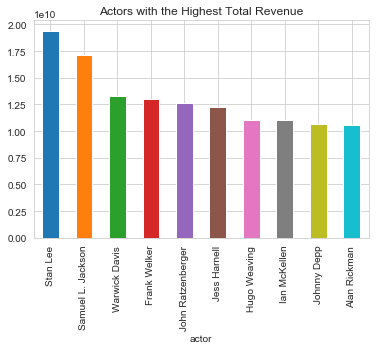

In [689]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Director with highest total revenue

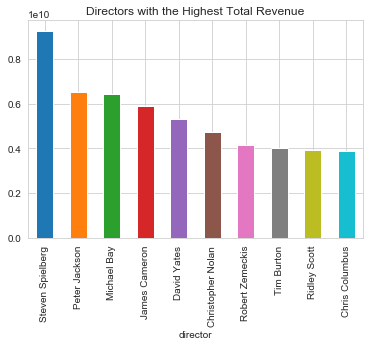

In [691]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

For average revenues, we will consider only actors and directors who have acted and directed in at least 5 movies respectively.

In [693]:
cast_df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week,crew,cast_size,crew_size,director,actor
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Tom Hanks
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Tim Allen
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Don Rickles
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Jim Varney
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Wallace Shawn


In [699]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list>5].index)

In [700]:
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

### Actors with highest average revenue

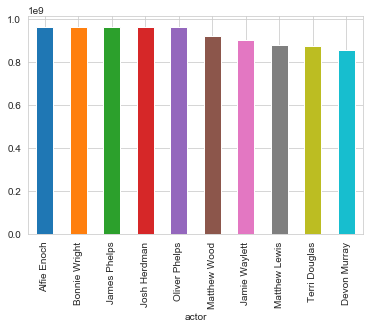

In [701]:
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

### Director with highest revenue

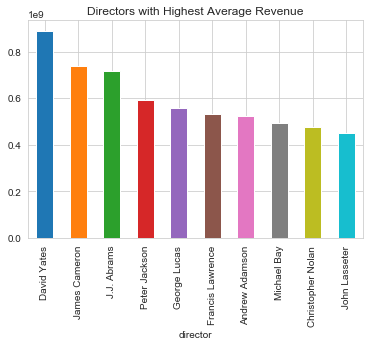

In [703]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Most successful actor

In [705]:
cast_df.head()

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,release_month,day_of_week,crew,cast_size,crew_size,director,actor
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Tom Hanks
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Tim Allen
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Don Rickles
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Jim Varney
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995.0,October,Monday,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter,Wallace Shawn


In [716]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 10000000.0) & cast_df['actor'].isin(actor_list)]

In [718]:
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


### Most successful director

In [719]:
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


In [722]:
df[(df['director']=='John G. Avildsen') & (df['return'].notnull())][['title','budget','revenue']]

,title,budget,revenue
1853,Rocky,1000000.0,117235147.0
2307,Rocky V,42000000.0,119946358.0
2315,The Karate Kid,8000000.0,90815558.0
2316,"The Karate Kid, Part II",113.0,115103979.0
5226,Joe,106000.0,19319254.0
5658,Neighbors,8500000.0,29916207.0


# Revenue Prediction

In [723]:
rgf = df[df['return'].notnull()]

In [724]:
rgf.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year',
       'release_month', 'day_of_week', 'cast', 'crew', 'cast_size',
       'crew_size', 'director'],
      dtype='object')

In [725]:
rgf.shape

(5393, 30)

In [726]:
rgf = rgf.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'return', 'crew'], 
               axis=1)

In [727]:
rgf.head(1)

,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,release_month,day_of_week,cast,cast_size,crew_size,director
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1995.0,October,Monday,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",13,106,John Lasseter


We will perform the following feature engineering tasks:

belongs_to_collection will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.

genres will be converted into number of genres.

homepage will be converted into a Boolean variable that will indicate if a movie has a homepage or not.

original_language will be replaced by a feature called is_foreign to denote if a particular film is in English or a Foreign Language.

production_companies will be replaced with just the number of production companies collaborating to make the movie.

production_countries will be replaced with the number of countries the film was shot in.

day will be converted into a binary feature to indicate if the film was released on a Friday.

month will be converted into a variable that indicates if the month was a holiday season.


In [729]:
s = rgf.apply(lambda x:pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
s.name = 'genre'
gen_rgf = rgf.drop('genres',axis=1).join(s)
genres_train= gen_rgf['genre'].drop_duplicates()

In [765]:
genres_train=  list(gen_rgf['genre'].unique())

In [779]:
len(genres_train)

20

In [792]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x==np.nan else 1)
    
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
        
    df['genres'] = df['genres'].apply(lambda x:len(x))
    df['homepage'] = df['homepage'].apply(lambda x:0 if x==np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language',axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x:len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x:len(x))
    df['is_friday'] = df['day_of_week'].apply(lambda x:1 if x=='Friday' else 0)
    df = df.drop('day_of_week',axis=1)
    df['is_holiday'] = df['release_month'].apply(lambda x:1 if x in ['April','May','June','December'] else 0)
    df = df.drop('release_month',axis=1)
    df = df.drop(['title','cast','director','spoken_languages'],axis=1)
    df = pd.get_dummies(df,prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [793]:
X, y = rgf.drop('revenue', axis=1), rgf['revenue']

In [794]:
X = feature_engineering(X)

In [795]:
X.shape

(5393, 36)

In [796]:
X.head()

,belongs_to_collection,budget,genres,homepage,popularity,production_companies,production_countries,runtime,vote_average,vote_count,year,cast_size,crew_size,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Documentary,is_Western,is_Music,is_TV Movie,is_english,is_friday,is_holiday
0,1,30000000.0,3,1,21.946943,1,1,81.0,7.7,5415.0,1995.0,13,106,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,65000000.0,3,1,17.015539,3,1,104.0,6.9,2413.0,1995.0,26,16,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,1,16000000.0,3,1,3.859495,1,1,127.0,6.1,34.0,1995.0,10,10,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
5,1,60000000.0,4,1,17.924927,3,1,170.0,7.7,1886.0,1995.0,65,71,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1
8,1,35000000.0,3,1,5.231580,3,1,106.0,5.5,174.0,1995.0,6,9,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1


In [797]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [798]:
reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.763064523365085

In [799]:
dummy = DummyRegressor()
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)

-0.001563867162822863

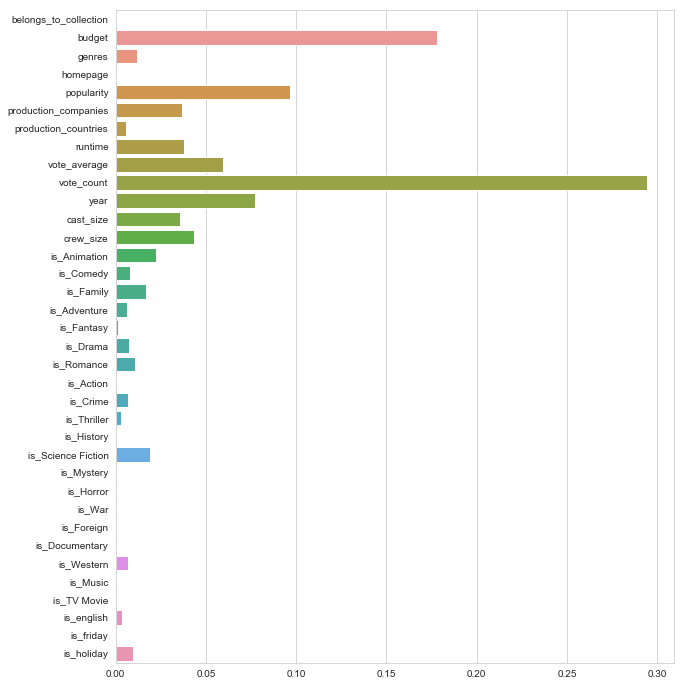

In [800]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

## Classification: Predicting movie success

In [801]:
cls = df[df['return'].notnull()]

In [802]:
cls.shape

(5393, 30)

In [803]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year',
       'release_month', 'day_of_week', 'cast', 'crew', 'cast_size',
       'crew_size', 'director'],
      dtype='object')

In [804]:
cls = cls.drop(['id', 'overview', 'poster_path', 'release_date', 'status','spoken_languages', 'tagline', 'revenue'], axis=1)

### First we need to convert return function to binary, for success we will put return of 1.5 as threshold

In [805]:
cls['return'] = cls['return'].apply(lambda x: 1 if x>=1.5 else 0)

In [807]:
cls['return'].value_counts()

1    3208
0    2185
Name: return, dtype: int64

In [810]:
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)

In [811]:
cls.head(2)

,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,runtime,title,video,vote_average,vote_count,return,year,release_month,day_of_week,cast,crew,cast_size,crew_size,director
0,1,30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,en,21.946943,[Pixar Animation Studios],[United States of America],81.0,Toy Story,False,7.7,5415.0,1,1995.0,October,Monday,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,John Lasseter
1,0,65000000.0,"[Adventure, Fantasy, Family]",NaN,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],104.0,Jumanji,False,6.9,2413.0,1,1995.0,December,Friday,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",26,16,Joe Johnston


/Users/suyashchavan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(0, 1)

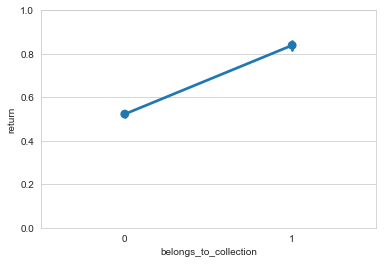

In [813]:
sns.pointplot(x='belongs_to_collection',y='return',data=cls)
plt.ylim(0,1)

#### pointplot shows that there is higher probability that movie will be successful if it belong to a collection

In [823]:
s = cls.apply(lambda x:pd.Series(x['genres']),axis=1)

In [824]:
s.head()

,0,1,2,3,4,5,6,7
0,Animation,Comedy,Family,NaN,NaN,NaN,NaN,NaN
1,Adventure,Fantasy,Family,NaN,NaN,NaN,NaN,NaN
3,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN
5,Action,Crime,Drama,Thriller,NaN,NaN,NaN,NaN
8,Action,Adventure,Thriller,NaN,NaN,NaN,NaN,NaN


In [825]:
s = s.stack()
s.head(20)

0   0    Animation
    1       Comedy
    2       Family
1   0    Adventure
    1      Fantasy
    2       Family
3   0       Comedy
    1        Drama
    2      Romance
5   0       Action
    1        Crime
    2        Drama
    3     Thriller
8   0       Action
    1    Adventure
    2     Thriller
9   0    Adventure
    1       Action
    2     Thriller
10  0       Comedy
dtype: object

In [826]:
s =s.reset_index(level=1,drop=True)
s.name='genre'

In [828]:
gen_cls = cls.drop('genres',axis=1).join(s)

In [830]:
gen_ctab = pd.crosstab(index=gen_cls['genre'],columns=gen_cls['return'],dropna=False)

In [831]:
gen_ctab

return,0,1
genre,,
Action,562,855
Adventure,335,631
Animation,87,208
Comedy,723,1131
Crime,365,499
Documentary,23,36
Drama,1183,1412
Family,169,367
Fantasy,188,325


In [835]:
gen_ctab = gen_ctab.apply(lambda x:x/x.sum(),axis=1)
gen_ctab

return,0,1
genre,,
Action,0.510407,0.489593
Adventure,0.457120,0.542880
Animation,0.398817,0.601183
Comedy,0.503446,0.496554
Crime,0.537063,0.462937
Documentary,0.503302,0.496698
Drama,0.570595,0.429405
Family,0.422083,0.577917
Fantasy,0.478476,0.521524


<Figure size 576x432 with 0 Axes>

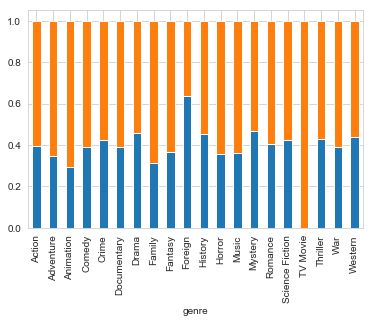

In [837]:
ctab = pd.crosstab([gen_cls['genre']], gen_cls['return'], dropna=False).apply(lambda x: x/x.sum(), axis=1)
plt.figure(figsize=(8,6))
ctab.plot(kind='bar', stacked=True, legend=False)

In [852]:
def classification_engineering(df):
    
    df = df.drop('homepage', axis=1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day_of_week'].apply(lambda x: 1 if x=='Friday' else 0)
    df = df.drop('day_of_week', axis=1)
    df['is_Holiday'] = df['release_month'].apply(lambda x: 1 if x in ['April', 'May', 'June', 'November','December'] else 0)
    df = df.drop('release_month', axis=1)
    df = df.drop(['title', 'cast', 'director'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    df = df.drop('crew', axis=1)
    return df
    



In [853]:
cls = classification_engineering(cls)

In [854]:
cls.head()

,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,runtime,video,vote_average,vote_count,return,year,cast_size,crew_size,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Documentary,is_Western,is_Music,is_TV Movie,is_english,is_Friday,is_Holiday
0,1,30000000.0,3,21.946943,1,1,81.0,False,7.7,5415.0,1,1995.0,13,106,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,65000000.0,3,17.015539,3,1,104.0,False,6.9,2413.0,1,1995.0,26,16,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,0,16000000.0,3,3.859495,1,1,127.0,False,6.1,34.0,1,1995.0,10,10,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
5,0,60000000.0,4,17.924927,3,1,170.0,False,7.7,1886.0,1,1995.0,65,71,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1
8,0,35000000.0,3,5.231580,3,1,106.0,False,5.5,174.0,1,1995.0,6,9,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1


In [855]:
cls.shape

(5393, 37)

In [856]:
X, y = cls.drop('return', axis=1), cls['return']

In [857]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, stratify=y)

In [858]:
clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [859]:
predictions = clf.predict(test_X)

In [860]:
from sklearn import metrics

In [861]:
metrics.confusion_matrix(test_y,predictions)

array([[372, 175],
       [149, 653]])

In [862]:
metrics.accuracy_score(test_y,predictions)

0.759822090437361

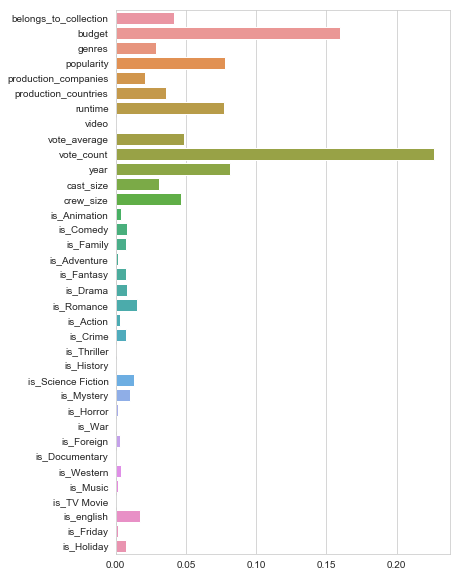

In [865]:
plt.figure(figsize=(6,10))
sns.barplot(x=clf.feature_importances_,y=X.columns)